# Housing Market 2018-2021 List v. Sale Price

### Exploratory Data Analysis

In this project we will compare information from two Zillow datasets [available here](https://www.zillow.com/research/data/):
  
1.)  <b>Median List Price</b> - The median price at which homes across various geographies were listed.  
2.) <b>Median Sale Price</b> - The median price at which homes across various geographies were sold.

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import cm
import matplotlib.colors as col

In [3]:
List = pd.read_csv('Median_List_Price.csv')
Sale = pd.read_csv('Median_Sale_Price.csv')

In [4]:
Sale.shape

(97, 159)

In [5]:
List.shape

(97, 43)

It looks like our Sale dataset is significantly longer, containing an extra ten years.  Lets cut it to only the years we will be using

In [6]:
Sale.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,102001,0,United States,Country,NaN,194833.0,196333.0,198167.0,199833.0,200633.0,...,264367.0,266000.0,268133.0,273793.0,280493.0,286293.0,288300.0,290633.0,290667.0,289833.0
1,394913,1,"New York, NY",Msa,NY,NaN,NaN,NaN,NaN,NaN,...,428333.0,431667.0,440000.0,444817.0,451483.0,455483.0,462333.0,470000.0,472333.0,474000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,503333.0,496333.0,490667.0,482333.0,469333.0,...,675000.0,673333.0,674667.0,688333.0,711667.0,727667.0,736000.0,736000.0,733333.0,728667.0
3,394463,3,"Chicago, IL",Msa,IL,248717.0,248717.0,251633.0,254667.0,256333.0,...,246333.0,253333.0,255000.0,256667.0,262833.0,266167.0,267833.0,265000.0,262333.0,257333.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,150163.0,153827.0,155997.0,158663.0,159333.0,...,279540.0,281633.0,285000.0,290000.0,296500.0,299338.0,299672.0,299838.0,300333.0,298000.0


In [7]:
Sale.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
       ...
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31'],
      dtype='object', length=159)

In [8]:
sale1 = Sale.iloc[:,0:5]

In [9]:
sale2 = Sale.iloc[:,122:159]

In [10]:
sales = pd.concat((sale1,sale2),axis=1)

In [11]:
sales.shape

(97, 42)

In [12]:
sales.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,102001,0,United States,Country,NaN,237333.0,237667.0,238667.0,242000.0,245667.0,...,264367.0,266000.0,268133.0,273793.0,280493.0,286293.0,288300.0,290633.0,290667.0,289833.0
1,394913,1,"New York, NY",Msa,NY,400167.0,399998.0,398998.0,398998.0,403000.0,...,428333.0,431667.0,440000.0,444817.0,451483.0,455483.0,462333.0,470000.0,472333.0,474000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,613000.0,616000.0,622000.0,634667.0,643333.0,...,675000.0,673333.0,674667.0,688333.0,711667.0,727667.0,736000.0,736000.0,733333.0,728667.0
3,394463,3,"Chicago, IL",Msa,IL,217615.0,217948.0,221282.0,229300.0,236633.0,...,246333.0,253333.0,255000.0,256667.0,262833.0,266167.0,267833.0,265000.0,262333.0,257333.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,252663.0,253663.0,255333.0,261667.0,268333.0,...,279540.0,281633.0,285000.0,290000.0,296500.0,299338.0,299672.0,299838.0,300333.0,298000.0


In [13]:
sales.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
       '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
       '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
       '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
       '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
       '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
       '2020-12-31', '2021-01-31'],
      dtype='object')

In [14]:
List = List.drop('2021-02-28',axis=1)

In [15]:
List.shape

(97, 42)

In [16]:
List.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
       '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
       '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
       '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
       '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
       '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
       '2020-12-31', '2021-01-31'],
      dtype='object')

Now our two datasets should reflect the same months from 2018-2021.

In [17]:
List.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,102001,0,United States,Country,NaN,271600.0,272967.0,279333.0,288667.0,295633.0,...,312891.0,320228.0,327728.0,334833.0,339833.0,342000.0,342967.0,341967.0,337300.0,332983.0
1,394913,1,"New York, NY",Msa,NY,520967.0,525967.0,535967.0,547667.0,557667.0,...,594333.0,599000.0,602667.0,612967.0,629596.0,642596.0,649296.0,649667.0,650000.0,650000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,797667.0,802333.0,816000.0,833000.0,846633.0,...,884966.0,879966.0,888600.0,918633.0,950300.0,961000.0,969333.0,974000.0,987667.0,995333.0
3,394463,3,"Chicago, IL",Msa,IL,299644.0,305773.0,319300.0,334867.0,344800.0,...,327800.0,331167.0,336167.0,343300.0,348267.0,349932.0,349502.0,345868.0,339203.0,331333.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,342000.0,345333.0,351663.0,359761.0,366094.0,...,339267.0,343133.0,348133.0,354800.0,358133.0,359783.0,359483.0,357950.0,354697.0,352360.0


In [18]:
USLISTPRICE = List.iloc[0,5:42]

In [19]:
USSALEPRICE = sales.iloc[0,5:42]

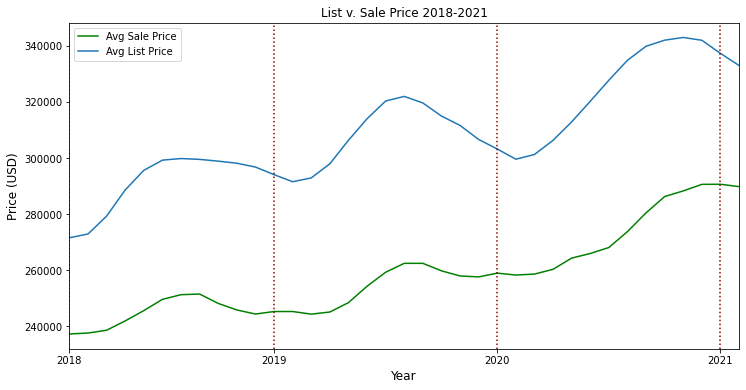

In [161]:
LegendLabels = ('Avg Sale Price','Avg List Price')
Xticks=[0,11,23,35]
Xlabels =('2018','2019','2020','2021')

plt.figure(figsize=(12,6))

USSALEPRICE.plot(color='g')
USLISTPRICE.plot()
plt.title('List v. Sale Price 2018-2021')
plt.legend(LegendLabels)
plt.xlabel('Year',fontsize='large')
plt.ylabel('Price (USD)',fontsize='large')
plt.margins(x=0)
plt.xticks(Xticks, labels=Xlabels)
plt.axvline(0, ls=':', color='darkred', label='2018')
plt.axvline(11, ls=':', color='darkred', label='2019')
plt.axvline(23, ls=':', color='darkred', label='2020')
plt.axvline(35, ls=':', color='darkred', label='2021')


plt.show()

From this chart, It would appear that recently the housing market tends to dip off of its annual highs towards year end.  The housing market may slow down during the winter and become more robust during the summer/fall. The  overall market so far has retained much of its increase through 2020 but is starting to show signs of slowing down overall.  Let's break these down into different pricing brackets and see if there are any differences.    

In [21]:
List = List.dropna()
List.shape

(83, 42)

In [22]:
sales = sales.dropna()
sales.shape

(96, 42)

In [23]:
sales.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
1,394913,1,"New York, NY",Msa,NY,400167.0,399998.0,398998.0,398998.0,403000.0,...,428333.0,431667.0,440000.0,444817.0,451483.0,455483.0,462333.0,470000.0,472333.0,474000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,613000.0,616000.0,622000.0,634667.0,643333.0,...,675000.0,673333.0,674667.0,688333.0,711667.0,727667.0,736000.0,736000.0,733333.0,728667.0
3,394463,3,"Chicago, IL",Msa,IL,217615.0,217948.0,221282.0,229300.0,236633.0,...,246333.0,253333.0,255000.0,256667.0,262833.0,266167.0,267833.0,265000.0,262333.0,257333.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,252663.0,253663.0,255333.0,261667.0,268333.0,...,279540.0,281633.0,285000.0,290000.0,296500.0,299338.0,299672.0,299838.0,300333.0,298000.0
5,394974,5,"Philadelphia, PA",Msa,PA,228133.0,224800.0,223333.0,228333.0,236000.0,...,249433.0,257400.0,263917.0,268000.0,276262.0,281228.0,279895.0,276633.0,273333.0,271667.0


We've now dropped the overall US row from each dataset as well as any Nan Values.

In [24]:
List = List.drop(['RegionID','SizeRank','RegionType','StateName'], axis=1)
sales = sales.drop(['RegionID','SizeRank','RegionType','StateName'], axis=1)

In [25]:
sales_breakdown = sales.describe().round(2)
List_breakdown = List.describe().round(2)

In [26]:
list_flipped = List_breakdown.transpose() 
sale_flipped = sales_breakdown.transpose() 

In [27]:
list_flipped = list_flipped.drop(['count'],axis=1)
sale_flipped = sale_flipped.drop(['count'],axis=1)

In [28]:
features = [ 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

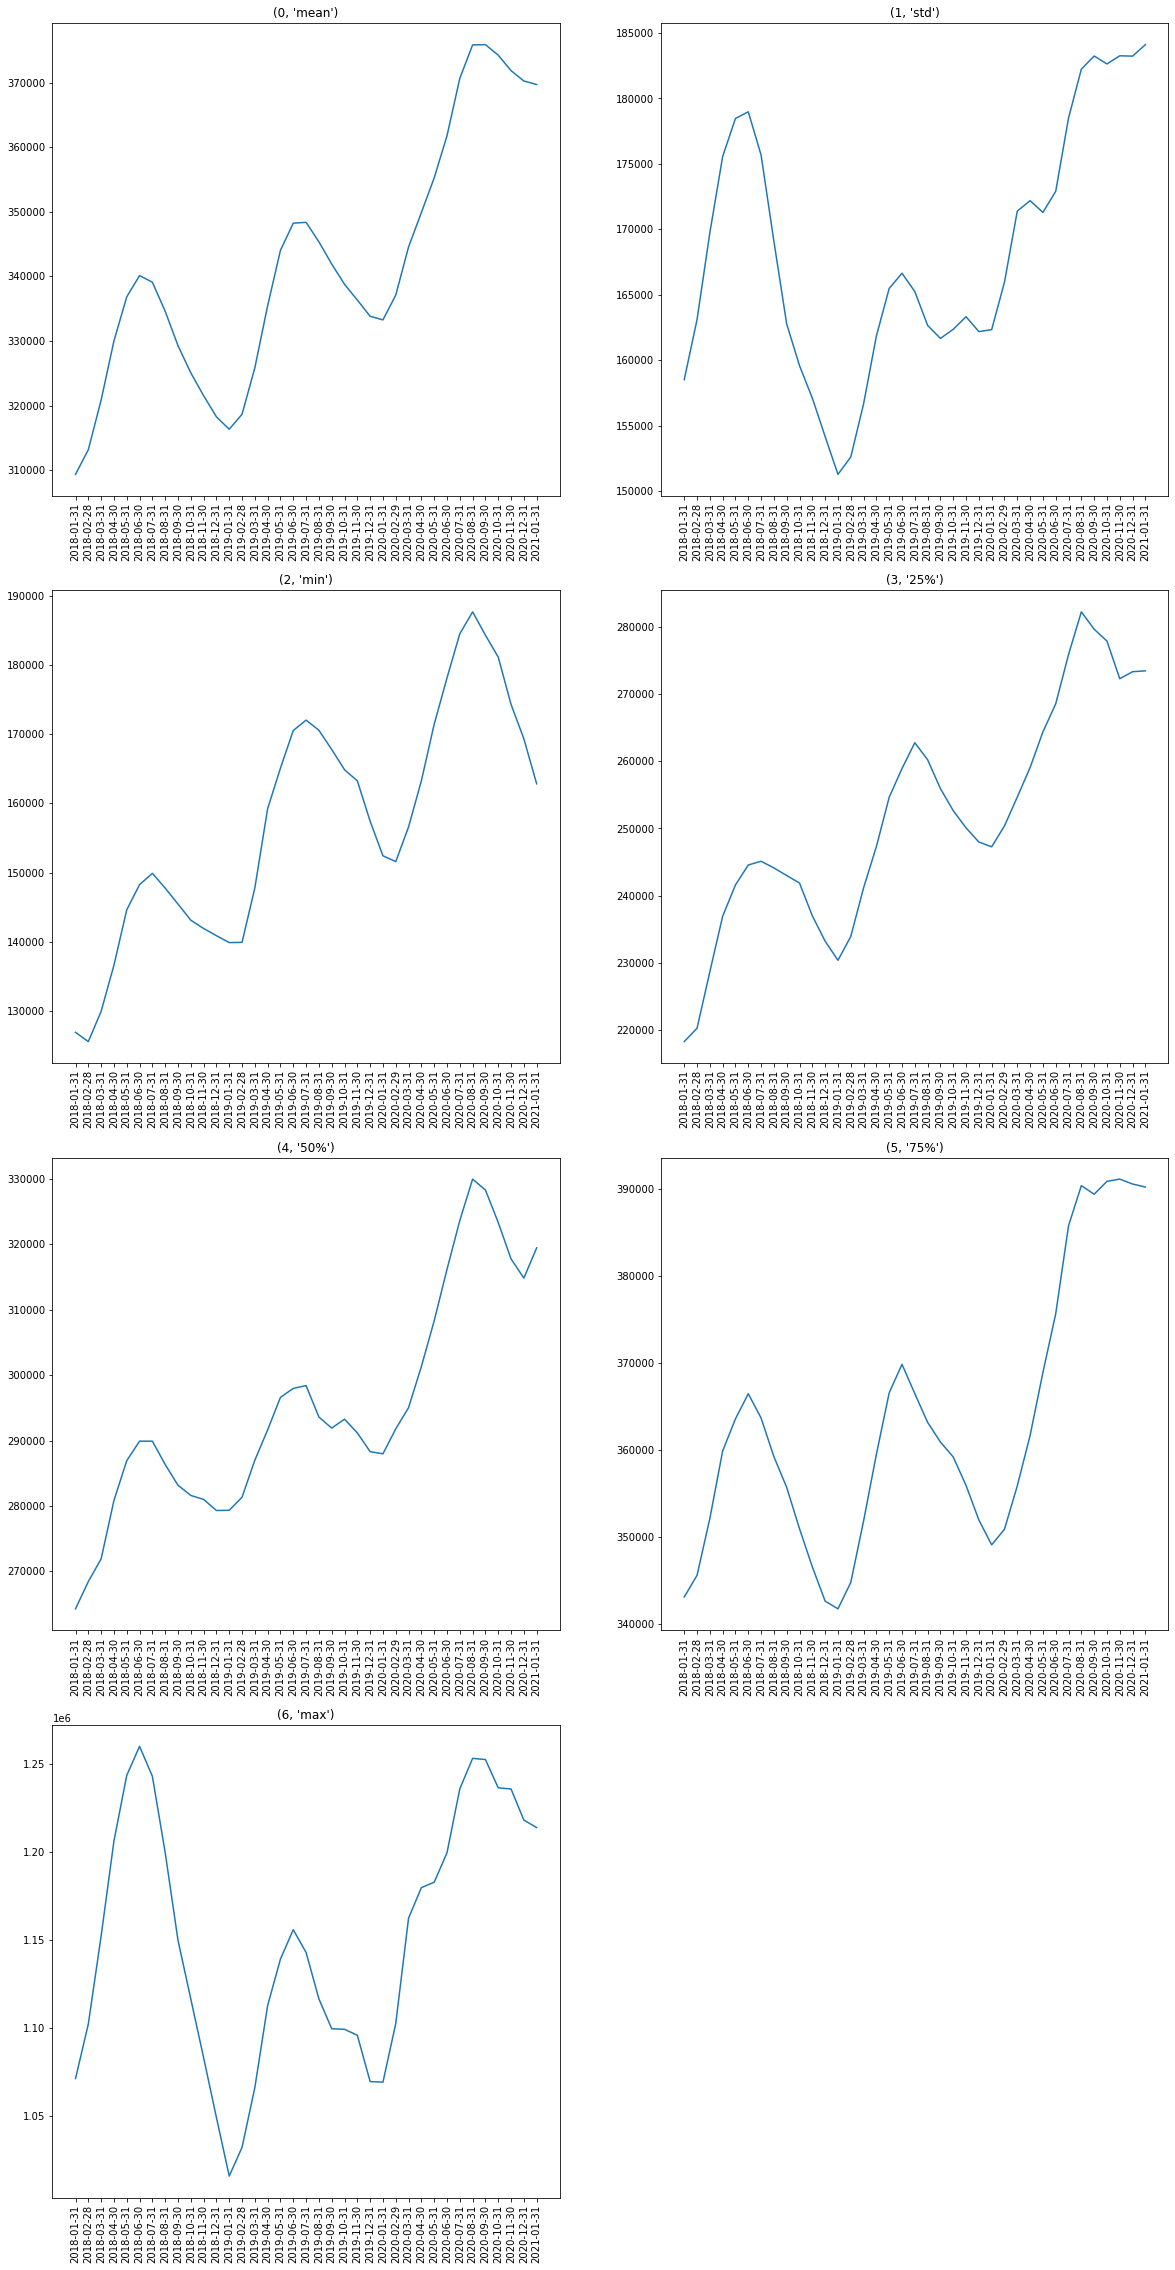

In [29]:
plt.figure(figsize=(20,40))

for i in enumerate(features):
    plt.subplot(4,2,i[0]+1)
    plt.plot(i[1], data=list_flipped)
    plt.xticks(rotation = 'vertical')
    plt.title(i)

In [43]:
yticks = np.arange(125000,475000,50000)
Legend1=['25% List','50% List','75% List','25% Sale','50% Sale','75% Sale']


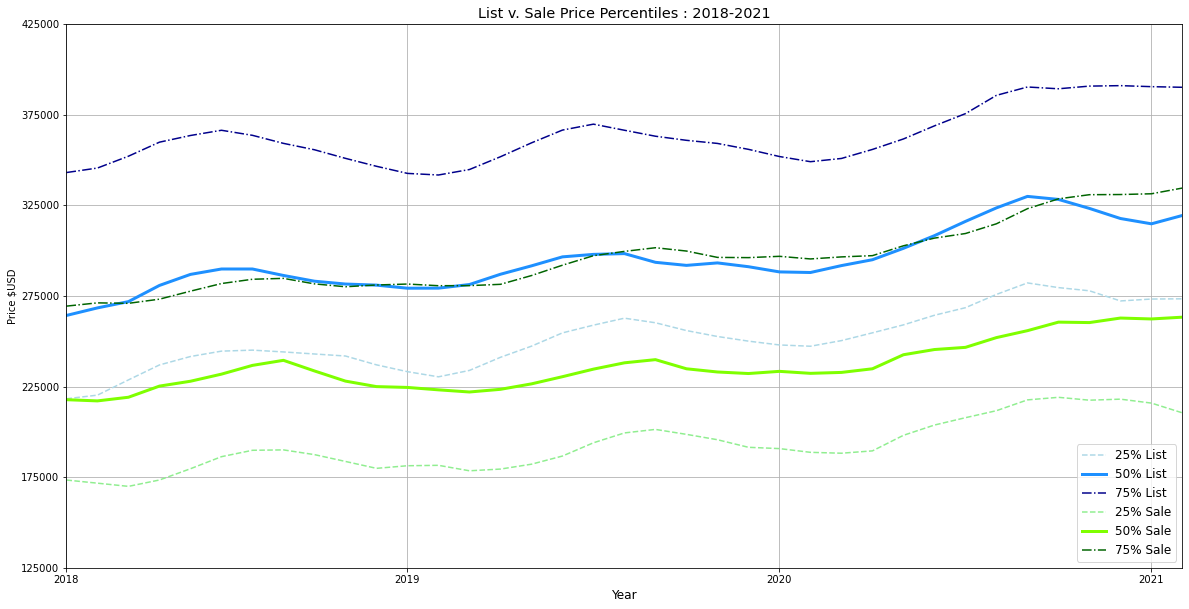

In [162]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(list_flipped['25%'],color='lightblue',ls='--')
ax.plot(list_flipped['50%'],color='dodgerblue',linewidth=3)
ax.plot(list_flipped['75%'],color='darkblue',ls='-.')
ax.plot(sale_flipped['25%'],color='lightgreen',ls='--')
ax.plot(sale_flipped['50%'],color='chartreuse',linewidth=3)
ax.plot(sale_flipped['75%'],color='darkgreen',ls='-.')


ax.set_title("List v. Sale Price Percentiles : 2018-2021", fontsize='x-large')
ax.set_ylabel('Price $USD')
ax.set_xlabel('Year',fontsize='large')


ax.set_xticks(Xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(Xlabels)
plt.margins(x=0)
ax.legend(Legend1,fontsize='large')


plt.grid()

It looks like sale price has remained strong for both the 50th and 75th percentile, but looks to have dipped a bit in January for the 25th percentile.  List prices seem to be stable heading into this year.  It is interesting to see The average list prices for each lower percentile tend to overlap with the lower percentiles list price.  

Let's take a closer look at California.  

In [61]:
CaliforniaList = List[List.RegionName.str.contains(', CA')]

In [63]:
CaliforniaList.shape

(9, 38)

In [64]:
CaliforniaSale = sales[sales.RegionName.str.contains(', CA')]

In [142]:
CaliforniaSale

,RegionName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
2,"Los Angeles-Long Beach-Anaheim, CA",613000.0,616000.0,622000.0,634667.0,643333.0,651000.0,655000.0,654000.0,647667.0,...,675000.0,673333.0,674667.0,688333.0,711667.0,727667.0,736000.0,736000.0,733333.0,728667.0
11,"San Francisco, CA",748167.0,740333.0,765333.0,813000.0,843000.0,858000.0,852000.0,833333.0,804167.0,...,806667.0,828333.0,839333.0,859333.0,886000.0,900000.0,901667.0,903333.0,898333.0,885000.0
13,"Riverside, CA",352667.0,358000.0,360667.0,364667.0,366000.0,368333.0,370000.0,368000.0,368000.0,...,390000.0,391667.0,395388.0,403054.0,411054.0,419333.0,426000.0,429667.0,431667.0,435000.0
17,"San Diego, CA",550167.0,549833.0,553667.0,567667.0,579000.0,586000.0,589333.0,593500.0,593500.0,...,601333.0,596333.0,598333.0,611333.0,631333.0,648000.0,651667.0,653333.0,651667.0,651667.0
25,"Sacramento, CA",387667.0,388333.0,390833.0,399833.0,405000.0,409833.0,411500.0,409833.0,408333.0,...,435333.0,437667.0,442000.0,450667.0,461667.0,470000.0,474667.0,474500.0,471833.0,478667.0
34,"San Jose, CA",972000.0,1003333.0,1074833.0,1141500.0,1174833.0,1160000.0,1141167.0,1119500.0,1079500.0,...,1107333.0,1127333.0,1129167.0,1123500.0,1126833.0,1130167.0,1151583.0,1148250.0,1146583.0,1148333.0
56,"Fresno, CA",265667.0,268083.0,266417.0,269750.0,268333.0,271667.0,275000.0,276000.0,273667.0,...,281667.0,283833.0,293833.0,303833.0,309417.0,310750.0,312417.0,314667.0,315000.0,313333.0
63,"Bakersfield, CA",228417.0,228250.0,226833.0,229167.0,231000.0,233333.0,236667.0,238333.0,239333.0,...,255667.0,257333.0,262667.0,264167.0,268500.0,269333.0,272833.0,275833.0,277500.0,284000.0
66,"Ventura, CA",593250.0,580917.0,578333.0,576667.0,588000.0,603000.0,601333.0,599917.0,598250.0,...,608167.0,611167.0,621167.0,631667.0,648333.0,666667.0,676000.0,684333.0,677667.0,686833.0
77,"Stockton, CA",370833.0,373833.0,381333.0,386500.0,385167.0,381333.0,379500.0,384500.0,383333.0,...,430000.0,428083.0,426667.0,424167.0,421000.0,422667.0,425167.0,431667.0,431667.0,433333.0


Let's take a closer look at the 2021 numbers across the state:

In [126]:
JAN_2021_CA = {'Area' : CaliforniaSale['RegionName'], 'List' : CaliforniaList['2021-01-31'], 'Sale' : CaliforniaSale['2021-01-31']}

In [127]:
JAN_2021_CA_DF = pd.DataFrame(JAN_2021_CA)

In [129]:
# We don't have a list price in Ventura, CA so we'll drop it now.
JAN_2021_CA_DF.dropna(inplace=True)

In [130]:
JAN_2021_CA_DF['Area'] = JAN_2021_CA_DF['Area'].str.replace(', CA','')
JAN_2021_CA_DF['Area'] = JAN_2021_CA_DF['Area'].str.replace('Los Angeles-Long Beach-Anaheim','Los Angeles')
JAN_2021_CA_DF['Area'] = JAN_2021_CA_DF['Area'].str.replace(r" \(.*\)","")

In [132]:
# Dropping the Decimal 
JAN_2021_CA_DF['List'] = JAN_2021_CA_DF['List'].astype(int)
JAN_2021_CA_DF['Sale'] = JAN_2021_CA_DF['Sale'].astype(int)


In [159]:
JAN_2021_CA_DF

,Area,List,Sale
2,Los Angeles,995333,728667
11,San Francisco,989667,885000
13,Riverside,491566,435000
17,San Diego,804633,651667
25,Sacramento,590333,478667
34,San Jose,1213667,1148333
56,Fresno,386033,313333
63,Bakersfield,277884,284000
77,Stockton,439957,433333


In [140]:
indx = np.arange(len(JAN_2021_CA_DF))+.25
price_label = np.arange(0, 1500000, 100000)
twenty1list = list(JAN_2021_CA_DF['List'])
twenty1sale = list(JAN_2021_CA_DF['Sale'])
indx_labels = JAN_2021_CA_DF['Area']
LegendLabels = ('List Price','Sale Price')

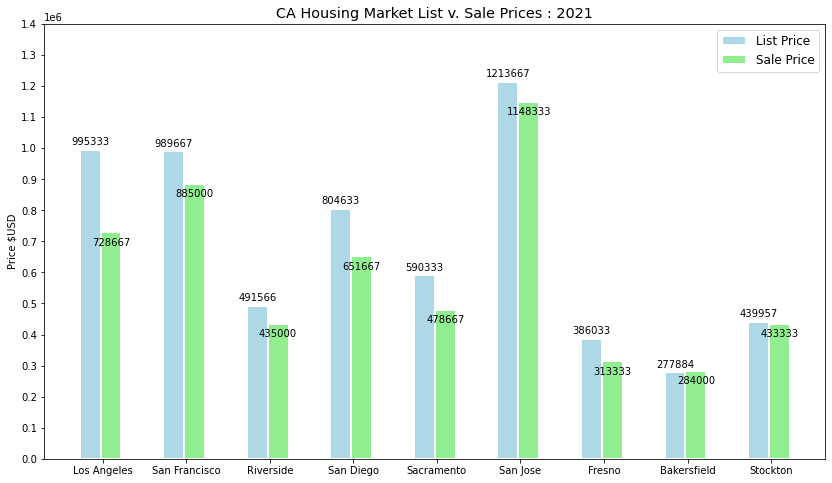

In [141]:
x = np.arange(len(indx_labels))
barWidth = 0.25

r1 = np.arange(len(twenty1list))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(figsize=(14,8))
rects1 = ax.bar(r1, JAN_2021_CA_DF['List'], width=barWidth,color='lightblue', edgecolor='white',linewidth =2)
rects2 = ax.bar(r2, JAN_2021_CA_DF['Sale'], width=barWidth,color='lightgreen', edgecolor='white',linewidth =2)

ax.set_ylabel('Price $USD')
ax.set_title("CA Housing Market List v. Sale Prices : 2021", fontsize='x-large')
ax.set_xticks(indx - .10)
ax.set_yticks(price_label)
ax.set_xticklabels(indx_labels)
ax.legend(LegendLabels,fontsize='large')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -15),  # -1 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel2(rects2)

plt.show()

Interestingly, Bakersfield, CA average sale pricing is higher than the average listing price.  Let's take a look at their numbers.

In [143]:
Baker_list = CaliforniaList.iloc[7,1:38]

In [145]:
Baker_sale = CaliforniaSale.iloc[7,1:38]

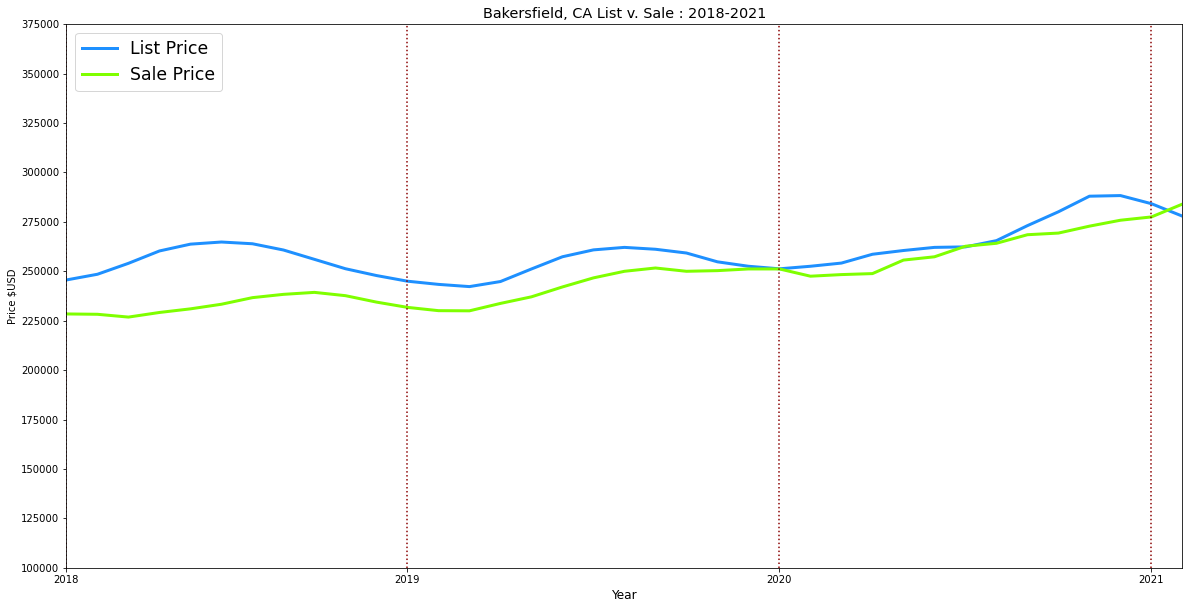

In [149]:
bakerYtix=np.arange(100000,400000,25000)
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(Baker_list,color='dodgerblue',linewidth=3)
ax.plot(Baker_sale,color='chartreuse',linewidth=3)

ax.set_title("Bakersfield, CA List v. Sale : 2018-2021", fontsize='x-large')
ax.set_ylabel('Price $USD')
ax.set_xlabel('Year',fontsize='large')

ax.set_yticks(bakerYtix)
ax.set_xticks(Xticks)
ax.set_xticklabels(Xlabels)
ax.legend(LegendLabels,fontsize='xx-large')


plt.margins(x=0)

plt.axvline(0, ls=':', color='darkred', label='2018')
plt.axvline(11, ls=':', color='darkred', label='2019')
plt.axvline(23, ls=':', color='darkred', label='2020')
plt.axvline(35, ls=':', color='darkred', label='2021')

plt.show()

It looks like this is a tight market with not a lot of growth.  However, with the average sale price passing the list average, it could be a good sign for the market here, as it indicates there are buyers at the current listing prices.  

Last, Let's view the same chart for The San Jose area, The most expensive average on our list.

In [150]:
SJ_list = CaliforniaList.iloc[5,1:38]
SJ_sale = CaliforniaSale.iloc[5,1:38]

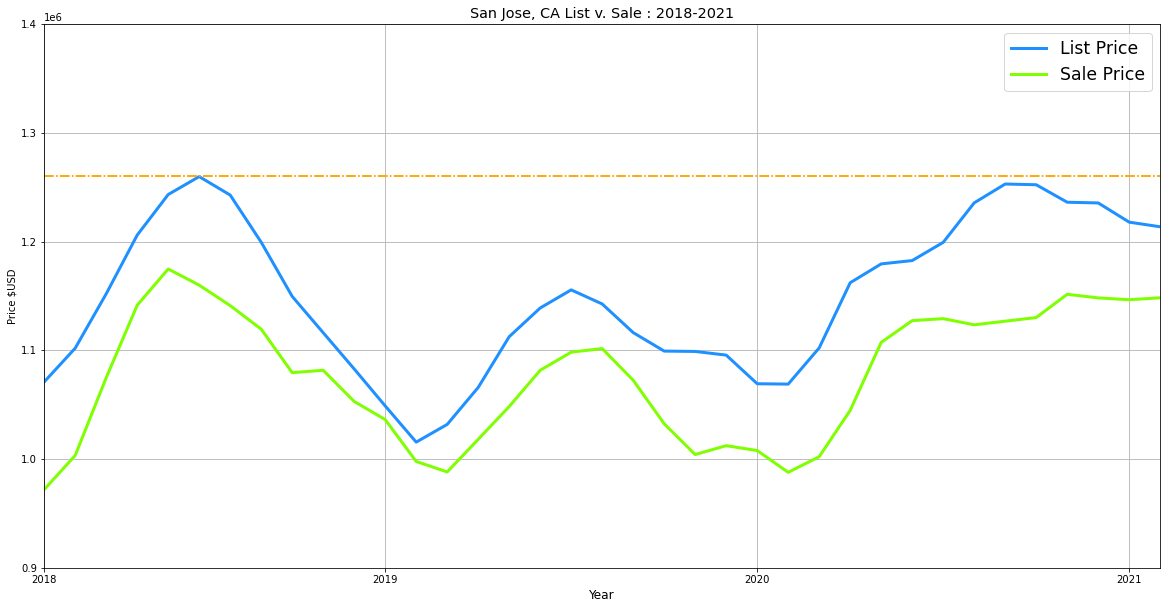

In [158]:
SJYtix=np.arange(900000,1500000,100000)
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(SJ_list,color='dodgerblue',linewidth=3)
ax.plot(SJ_sale,color='chartreuse',linewidth=3)
plt.axhline(1260000, ls='-.', color='orange', label='peak')


ax.set_title("San Jose, CA List v. Sale : 2018-2021", fontsize='x-large')
ax.set_ylabel('Price $USD')
ax.set_xlabel('Year',fontsize='large')

ax.set_yticks(SJYtix)
ax.set_xticks(Xticks)
ax.set_xticklabels(Xlabels)
ax.legend(LegendLabels,fontsize='xx-large')


plt.margins(x=0)

plt.axhline(1260000, ls='-.', color='orange', label='peak')



plt.grid()

With a average listing around 1.26 million USD in mid 2018, this is the first area where we've seen a peak outside of 2020.  
It will be interesting to see if San Jose will reach a new high in 2021 or if this will be established as a ceiling.  